**CS301 Assignment 4**

*Muhammed Orhun Gale - 26754*

In [293]:
import random
import time
from statistics import mean
from matplotlib import pyplot as plt

# **findShortestPath Procedure**

In [20]:
def findShortestPath(sourceNode, Vertices, Edges):
  #Initilize the list that stores the distance estimates for each vertex
  distanceEstimates = [float("Inf")] * len(Vertices)

  #Initilize the list that keeps track of the vertices that creates the shortest path
  piList = [-1] * len(Vertices)

  #Set source vertex as 0
  distanceEstimates[sourceNode] = 0
  
  #Since this algorithm is a Bellman-Ford variant,
    #For each vertex except the source node (|V| - 1) algorithm must relax all of the edges
  for i in range(len(Vertices) - 1):  
    #For each edge
    for u, v, w in Edges:
      #If current estimate is bigger than the new one
      if distanceEstimates[v] > distanceEstimates[u] + w:
        #Set parent vertex to keep track of the shortest path
        piList[v] = u
        #Relax the edge
        distanceEstimates[v] = distanceEstimates[u] + w
                
  return distanceEstimates, piList

#**Assignment Example**

In [189]:


cities =[
          ['Istanbul','Harem', 'Bostanci'], 
          ['Bursa','Merkez', '-'],
          ['Eskisehir','Yeni', 'YHT']
        ]

busRoutes = [['Istanbul_Harem', 'Bursa_Merkez', 100], ['Bursa_Merkez', 'Eskisehir_Yeni', 120]]
trainRoutes = [['Istanbul_Bostanci', 'Eskisehir_YHT', 180]]
inCityRoute = [['Istanbul_Bostanci', 'Istanbul_Harem', 30], ['Eskisehir_Yeni', 'Eskisehir_YHT', 10]]

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: Bursa_Merkez


From Bursa_Merkez you can reach to cities in shortest: 

Istanbul: 100 minutes via route:
Bursa_Merkez --> Istanbul_Harem


Eskisehir: 120 minutes via route:
Bursa_Merkez --> Eskisehir_Yeni


Algorithm run time: 0.00011640200136753265




# Worst-case performance testing (Complete Graph) (Dense)

##City initilize

In [344]:
from sys import base_exec_prefix
cities20 = []

busRoutes20 = []
trainRoutes20 = []
inCityRoute20 = []

for i in range (0, 10):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities20.append(city)


for city in cities20:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute20.append(inCity)

    
for i in range (0, len(cities20)):
  for j in range (i + 1, len(cities20)):
    city1 = cities20[i]
    city2 = cities20[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes20.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes20.append(trainRoute)


###########################################################
cities40 = []

busRoutes40 = []
trainRoutes40 = []
inCityRoute40 = []

for i in range (0, 40):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities40.append(city)


for city in cities40:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute40.append(inCity)

    
for i in range (0, len(cities40)):
  for j in range (i + 1, len(cities40)):
    city1 = cities40[i]
    city2 = cities40[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes40.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes40.append(trainRoute)


###########################################################

cities60 = []

busRoutes60 = []
trainRoutes60 = []
inCityRoute60 = []

for i in range (0, 60):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities60.append(city)


for city in cities60:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute60.append(inCity)

    
for i in range (0, len(cities60)):
  for j in range (i + 1, len(cities60)):
    city1 = cities60[i]
    city2 = cities60[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes60.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes60.append(trainRoute)

cities80 = []

busRoutes80 = []
trainRoutes80 = []
inCityRoute80 = []

for i in range (0, 80):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities80.append(city)


for city in cities80:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute80.append(inCity)

    
for i in range (0, len(cities80)):
  for j in range (i + 1, len(cities80)):
    city1 = cities80[i]
    city2 = cities80[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes80.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes80.append(trainRoute)

cities100 = []

busRoutes100 = []
trainRoutes100 = []
inCityRoute100 = []

for i in range (0, 100):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities100.append(city)


for city in cities100:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute100.append(inCity)

    
for i in range (0, len(cities100)):
  for j in range (i + 1, len(cities100)):
    city1 = cities100[i]
    city2 = cities100[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes100.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes100.append(trainRoute)


cities200 = []

busRoutes200 = []
trainRoutes200 = []
inCityRoute200 = []

for i in range (0, 200):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities200.append(city)


for city in cities200:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute200.append(inCity)

    
for i in range (0, len(cities200)):
  for j in range (i + 1, len(cities200)):
    city1 = cities200[i]
    city2 = cities200[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes200.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes200.append(trainRoute)




cities180 = []

busRoutes180 = []
trainRoutes180 = []
inCityRoute180 = []

for i in range (0, 180):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities180.append(city)


for city in cities180:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute180.append(inCity)

    
for i in range (0, len(cities180)):
  for j in range (i + 1, len(cities180)):
    city1 = cities180[i]
    city2 = cities180[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes180.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes180.append(trainRoute)


cities160 = []

busRoutes160 = []
trainRoutes160 = []
inCityRoute160 = []

for i in range (0, 160):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities160.append(city)


for city in cities160:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute160.append(inCity)

    
for i in range (0, len(cities160)):
  for j in range (i + 1, len(cities160)):
    city1 = cities160[i]
    city2 = cities160[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes160.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes160.append(trainRoute)
    

cities120 = []

busRoutes120 = []
trainRoutes120 = []
inCityRoute120 = []

for i in range (0, 120):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities120.append(city)


for city in cities120:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute120.append(inCity)

    
for i in range (0, len(cities120)):
  for j in range (i + 1, len(cities120)):
    city1 = cities120[i]
    city2 = cities120[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes120.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes120.append(trainRoute)


cities140 = []

busRoutes140 = []
trainRoutes140 = []
inCityRoute140 = []

for i in range (0, 140):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities140.append(city)


for city in cities140:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute140.append(inCity)

    
for i in range (0, len(cities140)):
  for j in range (i + 1, len(cities140)):
    city1 = cities140[i]
    city2 = cities140[j]
    busRoute = []
    busRoute.append(city1[1])
    busRoute.append(city2[1])
    busRoute.append(random.randint(20, 200))  
    busRoutes140.append(busRoute)

    trainRoute = []
    trainRoute.append(city1[2])
    trainRoute.append(city2[2])
    trainRoute.append(random.randint(20, 200))  
    trainRoutes140.append(trainRoute)
    

##City 20

In [235]:
worst_20_av = []

In [ ]:
cities = cities20
busRoutes = busRoutes20
trainRoutes = trainRoutes20
inCityRoute = inCityRoute20

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_20_av.append((end - start))

result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

In [241]:
worst_20_av

[0.0008236760004365351,
 0.0009666799996921327,
 0.0009246609988622367,
 0.0008221700009016786,
 0.0008826980010780971]

##City 40

In [139]:
worst_40_av = []

In [ ]:
cities = cities40
busRoutes = busRoutes40
trainRoutes = trainRoutes40
inCityRoute = inCityRoute40

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_40_av.append((end - start))

result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

In [ ]:
worst_40_av

##City 60

In [140]:
worst_60_av = []

In [ ]:
cities = cities60
busRoutes = busRoutes60
trainRoutes = trainRoutes60
inCityRoute = inCityRoute60

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_60_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 80

In [141]:
worst_80_av = []

In [174]:
cities = cities80
busRoutes = busRoutes80
trainRoutes = trainRoutes80
inCityRoute = inCityRoute80

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_80_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 68 minutes via route:
A_trainStation --> V_trainStation --> B_trainStation


C: 68 minutes via route:
A_trainStation --> A_busStation --> C_busStation


D: 74 minutes via route:
A_trainStation --> _trainStation --> _trainStation --> D_trainStation


E: 59 minutes via route:
A_trainStation --> J_trainStation --> E_trainStation


F: 63 minutes via route:
A_trainStation --> J_trainStation --> F_trainStation


G: 65 minutes via route:
A_trainStation --> J_trainStation --> J_busStation --> G_busStation


H: 58 minutes via route:
A_trainStation --> g_trainStation --> H_trainStation


I: 63 minutes via route:
A_trainStation --> V_trainStation --> I_trainStation


J: 30 minutes via route:
A_trainStation --> J_trainStation


K: 72 minutes via route:
A_trainStation --> g_trainStation --> K_trainStation


L: 84 minutes via route:
A_trainStation --> c_trainStation --> L_trainStat

In [ ]:
worst_80_av

##City 100

In [142]:
worst_100_av = []

In [179]:
cities = cities100
busRoutes = busRoutes100
trainRoutes = trainRoutes100
inCityRoute = inCityRoute100

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_100_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 51 minutes via route:
A_trainStation --> p_trainStation --> B_trainStation


C: 59 minutes via route:
A_trainStation --> __trainStation --> C_trainStation


D: 48 minutes via route:
A_trainStation --> D_trainStation


E: 62 minutes via route:
A_trainStation --> p_trainStation --> E_trainStation


F: 52 minutes via route:
A_trainStation --> p_trainStation --> F_trainStation


G: 62 minutes via route:
A_trainStation --> h_trainStation --> G_trainStation


H: 22 minutes via route:
A_trainStation --> H_trainStation


I: 50 minutes via route:
A_trainStation --> p_trainStation --> I_trainStation


J: 68 minutes via route:
A_trainStation --> _trainStation --> J_trainStation


K: 51 minutes via route:
A_trainStation --> _trainStation --> K_trainStation


L: 43 minutes via route:
A_trainStation --> L_trainStation


M: 51 minutes via route:
A_trainStation --> p_trainStation -->

##City 120

In [345]:
worst_120_av = []

In [346]:
cities = cities120
busRoutes = busRoutes120
trainRoutes = trainRoutes120
inCityRoute = inCityRoute120

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_120_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 66 minutes via route:
A_trainStation --> ]_trainStation --> a_trainStation --> B_trainStation


C: 53 minutes via route:
A_trainStation --> \_trainStation --> C_trainStation


D: 79 minutes via route:
A_trainStation --> _trainStation --> _trainStation --> D_trainStation


E: 51 minutes via route:
A_trainStation --> E_trainStation


F: 45 minutes via route:
A_trainStation --> ¯_trainStation --> F_trainStation


G: 64 minutes via route:
A_trainStation --> _trainStation --> G_trainStation


H: 60 minutes via route:
A_trainStation --> _trainStation --> H_trainStation


I: 40 minutes via route:
A_trainStation --> I_trainStation


J: 40 minutes via route:
A_trainStation --> ¦_trainStation --> J_trainStation


K: 43 minutes via route:
A_trainStation --> K_trainStation


L: 61 minutes via route:
A_trainStation --> A_busStation --> L_busStation


M: 24 minutes via route:
A_t

##City 140

In [348]:
worst_140_av = []

In [349]:
cities = cities140
busRoutes = busRoutes140
trainRoutes = trainRoutes140
inCityRoute = inCityRoute140

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_140_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 55 minutes via route:
A_trainStation --> _trainStation --> B_trainStation


C: 42 minutes via route:
A_trainStation --> Q_trainStation --> C_trainStation


D: 40 minutes via route:
A_trainStation --> u_trainStation --> D_trainStation


E: 66 minutes via route:
A_trainStation --> u_trainStation --> {_trainStation --> E_trainStation


F: 44 minutes via route:
A_trainStation --> u_trainStation --> F_trainStation


G: 53 minutes via route:
A_trainStation --> _trainStation --> G_trainStation


H: 42 minutes via route:
A_trainStation --> u_trainStation --> H_trainStation


I: 56 minutes via route:
A_trainStation --> _trainStation --> I_trainStation


J: 53 minutes via route:
A_trainStation --> Q_trainStation --> J_trainStation


K: 47 minutes via route:
A_trainStation --> _trainStation --> K_trainStation


L: 64 minutes via route:
A_trainStation --> Y_trainStation --> Y_b

##City 160

In [350]:
worst_160_av = []

In [351]:
cities = cities160
busRoutes = busRoutes160
trainRoutes = trainRoutes160
inCityRoute = inCityRoute160

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_160_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 57 minutes via route:
A_trainStation --> B_trainStation


C: 60 minutes via route:
A_trainStation --> Ë_trainStation --> Ë_busStation --> C_busStation


D: 31 minutes via route:
A_trainStation --> D_trainStation


E: 54 minutes via route:
A_trainStation --> Ç_trainStation --> E_trainStation


F: 35 minutes via route:
A_trainStation --> F_trainStation


G: 48 minutes via route:
A_trainStation --> N_trainStation --> G_trainStation


H: 51 minutes via route:
A_trainStation --> ¯_trainStation --> H_trainStation


I: 53 minutes via route:
A_trainStation --> ¯_trainStation --> I_trainStation


J: 54 minutes via route:
A_trainStation --> Q_trainStation --> J_trainStation


K: 59 minutes via route:
A_trainStation --> r_trainStation --> K_trainStation


L: 73 minutes via route:
A_trainStation --> Î_trainStation --> _trainStation --> L_trainStation


M: 64 minutes via route:
A_t

##City 180

In [352]:
worst_180_av = []

In [ ]:
cities = cities180
busRoutes = busRoutes180
trainRoutes = trainRoutes180
inCityRoute = inCityRoute180

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_180_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 200

In [355]:
worst_200_av = []

In [356]:
cities = cities200
busRoutes = busRoutes200
trainRoutes = trainRoutes200
inCityRoute = inCityRoute200

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

worst_200_av.append((end - start))

result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 43 minutes via route:
A_trainStation --> §_trainStation --> B_trainStation


C: 57 minutes via route:
A_trainStation --> ³_trainStation --> C_trainStation


D: 55 minutes via route:
A_trainStation --> i_trainStation --> D_trainStation


E: 57 minutes via route:
A_trainStation --> {_trainStation --> E_trainStation


F: 54 minutes via route:
A_trainStation --> ó_trainStation --> F_trainStation


G: 56 minutes via route:
A_trainStation --> _trainStation --> G_trainStation


H: 47 minutes via route:
A_trainStation --> Ç_trainStation --> H_trainStation


I: 24 minutes via route:
A_trainStation --> I_trainStation


J: 60 minutes via route:
A_trainStation --> ³_trainStation --> ³_busStation --> J_busStation


K: 40 minutes via route:
A_trainStation --> K_trainStation


L: 58 minutes via route:
A_trainStation --> ©_trainStation --> L_trainStation


M: 42 minutes via route:
A_t

##Statistics

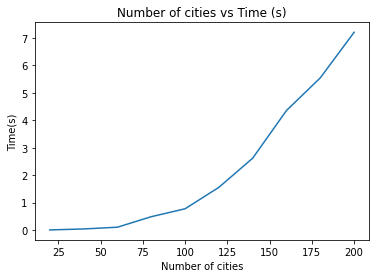

In [357]:
av_runs = [20,40,60,80,100,120,140,160,180,200]
worst_means = []

worst_means.append(mean(worst_20_av))
worst_means.append(mean(worst_40_av))
worst_means.append(mean(worst_60_av))
worst_means.append(mean(worst_80_av))
worst_means.append(mean(worst_100_av))
worst_means.append(mean(worst_120_av))
worst_means.append(mean(worst_140_av))
worst_means.append(mean(worst_160_av))
worst_means.append(mean(worst_180_av))
worst_means.append(mean(worst_200_av))

plt.plot(av_runs, worst_means)
plt.title('Number of cities vs Time (s)')
plt.xlabel('Number of cities')
plt.ylabel('Time(s)')
plt.show()

# Average-case performance testing (Random Edges) (Sparse)

##City Initilize

In [329]:
from sys import base_exec_prefix
cities20 = []

busRoutes20 = []
trainRoutes20 = []
inCityRoute20 = []

for i in range (0, 10):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities20.append(city)


for city in cities20:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute20.append(inCity)

    
for i in range (0, len(cities20)):
    for j in range (i + 1, len(cities20)):
      city1 = cities20[i]
      city2 = cities20[j]
      if(random.randint(0, 5) == 0):
        busRoute = []
        busRoute.append(city1[1])
        busRoute.append(city2[1])
        busRoute.append(random.randint(20, 200))  
        busRoutes20.append(busRoute)

      if(random.randint(0, 5) == 1):
        trainRoute = []
        trainRoute.append(city1[2])
        trainRoute.append(city2[2])
        trainRoute.append(random.randint(20, 200))  
        trainRoutes20.append(trainRoute)


###########################################################
cities40 = []

busRoutes40 = []
trainRoutes40 = []
inCityRoute40 = []

for i in range (0, 40):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities40.append(city)


for city in cities40:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute40.append(inCity)

    
for i in range (0, len(cities40)):
  for j in range (i + 1, len(cities40)):
    city1 = cities40[i]
    city2 = cities40[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes40.append(busRoute)

    if(random.randint(0, 5) == 1):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes40.append(trainRoute)


###########################################################

cities60 = []

busRoutes60 = []
trainRoutes60 = []
inCityRoute60 = []

for i in range (0, 60):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities60.append(city)


for city in cities60:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute60.append(inCity)

    
for i in range (0, len(cities60)):
  for j in range (i + 1, len(cities60)):
    city1 = cities60[i]
    city2 = cities60[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes60.append(busRoute)

    if(random.randint(0, 5) == 1):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes60.append(trainRoute)

cities80 = []

busRoutes80 = []
trainRoutes80 = []
inCityRoute80 = []

for i in range (0, 80):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities80.append(city)


for city in cities80:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute80.append(inCity)

    
for i in range (0, len(cities80)):
  for j in range (i + 1, len(cities80)):
    city1 = cities80[i]
    city2 = cities80[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes80.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes80.append(trainRoute)

cities100 = []

busRoutes100 = []
trainRoutes100 = []
inCityRoute100 = []

for i in range (0, 100):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities100.append(city)


for city in cities100:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute100.append(inCity)

    
for i in range (0, len(cities100)):
  for j in range (i + 1, len(cities100)):
    city1 = cities100[i]
    city2 = cities100[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes100.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes100.append(trainRoute)


cities200 = []

busRoutes200 = []
trainRoutes200 = []
inCityRoute200 = []

for i in range (0, 200):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities200.append(city)


for city in cities200:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute200.append(inCity)

    
for i in range (0, len(cities200)):
  for j in range (i + 1, len(cities200)):
    city1 = cities200[i]
    city2 = cities200[j]
    
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes200.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes200.append(trainRoute)


cities180 = []

busRoutes180 = []
trainRoutes180 = []
inCityRoute180 = []

for i in range (0, 180):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities180.append(city)


for city in cities180:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute180.append(inCity)

    
for i in range (0, len(cities180)):
  for j in range (i + 1, len(cities180)):
    city1 = cities180[i]
    city2 = cities180[j]
    if(random.randint(0, 5) == 0):

      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes180.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes180.append(trainRoute)


cities160 = []

busRoutes160 = []
trainRoutes160 = []
inCityRoute160 = []

for i in range (0, 160):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities160.append(city)


for city in cities160:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute160.append(inCity)

    
for i in range (0, len(cities160)):
  for j in range (i + 1, len(cities160)):
    city1 = cities160[i]
    city2 = cities160[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes160.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes160.append(trainRoute)
    

cities120 = []

busRoutes120 = []
trainRoutes120 = []
inCityRoute120 = []

for i in range (0, 120):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities120.append(city)


for city in cities120:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute120.append(inCity)

    
for i in range (0, len(cities120)):
  for j in range (i + 1, len(cities120)):
    city1 = cities120[i]
    city2 = cities120[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes120.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes120.append(trainRoute)


cities140 = []

busRoutes140 = []
trainRoutes140 = []
inCityRoute140 = []

for i in range (0, 140):
  city = []
  city.append(chr(i+65))
  city.append(str(chr(i+65) + "_busStation"))
  city.append(str(chr(i+65) + "_trainStation"))
  cities140.append(city)


for city in cities140:
    inCity = []
    inCity.append(city[1])
    inCity.append(city[2])
    inCity.append(random.randint(4, 64))  
    inCityRoute140.append(inCity)

    
for i in range (0, len(cities140)):
  for j in range (i + 1, len(cities140)):
    city1 = cities140[i]
    city2 = cities140[j]
    if(random.randint(0, 5) == 0):
      busRoute = []
      busRoute.append(city1[1])
      busRoute.append(city2[1])
      busRoute.append(random.randint(20, 200))  
      busRoutes140.append(busRoute)

    if(random.randint(0, 5) == 0):
      trainRoute = []
      trainRoute.append(city1[2])
      trainRoute.append(city2[2])
      trainRoute.append(random.randint(20, 200))  
      trainRoutes140.append(trainRoute)
    

##City 20

In [225]:
average_20_av = []

In [ ]:
cities = cities20
busRoutes = busRoutes20
trainRoutes = trainRoutes20
inCityRoute = inCityRoute20

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_20_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

In [233]:
average_20_av

[0.0003025539990630932,
 0.00027412999770604074,
 0.00028690500039374456,
 0.00031943599969963543,
 0.00032445900069433264]

##City 40

In [243]:
average_40_av = []


In [ ]:
cities = cities40
busRoutes = busRoutes40
trainRoutes = trainRoutes40
inCityRoute = inCityRoute40

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_40_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 60

In [252]:
average_60_av = []


In [ ]:
cities = cities60
busRoutes = busRoutes60
trainRoutes = trainRoutes60
inCityRoute = inCityRoute60

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()

average_60_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 80

In [259]:
average_80_av = []

In [265]:
cities = cities80
busRoutes = busRoutes80
trainRoutes = trainRoutes80
inCityRoute = inCityRoute80

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_80_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: A_trainStation


From A_trainStation you can reach to cities in shortest: 

B: 160 minutes via route:
A_trainStation --> A_busStation --> c_busStation --> w_busStation --> B_busStation


C: 100 minutes via route:
A_trainStation --> A_busStation --> `_busStation --> C_busStation


D: 116 minutes via route:
A_trainStation --> S_trainStation --> _trainStation --> t_trainStation --> D_trainStation


E: 107 minutes via route:
A_trainStation --> S_trainStation --> S_busStation --> E_busStation


F: 59 minutes via route:
A_trainStation --> Z_trainStation --> F_trainStation


G: 107 minutes via route:
A_trainStation --> S_trainStation --> O_trainStation --> G_trainStation


H: 107 minutes via route:
A_trainStation --> S_trainStation --> _trainStation --> H_trainStation


I: 110 minutes via route:
A_trainStation --> Z_trainStation --> I_trainStation


J: 121 minutes via route:
A_trainStation --> Y_trainStation --> J_trainStation


K: 95 minutes via route

##City 100

In [149]:
average_100_av = []

In [ ]:
cities = cities100
busRoutes = busRoutes100
trainRoutes = trainRoutes100
inCityRoute = inCityRoute100

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_100_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 120

In [330]:
average_120_av = []

In [ ]:
cities = cities120
busRoutes = busRoutes120
trainRoutes = trainRoutes120
inCityRoute = inCityRoute120

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_120_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 140

In [333]:
average_140_av = []

In [ ]:
cities = cities140
busRoutes = busRoutes140
trainRoutes = trainRoutes140
inCityRoute = inCityRoute140

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_140_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 160

In [335]:
average_160_av = []

In [ ]:
cities = cities160
busRoutes = busRoutes160
trainRoutes = trainRoutes160
inCityRoute = inCityRoute160

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_160_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 180

In [337]:
average_180_av = []

In [ ]:
cities = cities180
busRoutes = busRoutes180
trainRoutes = trainRoutes180
inCityRoute = inCityRoute180

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_180_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##City 200

In [340]:
average_200_av = []

In [ ]:
cities = cities200
busRoutes = busRoutes200
trainRoutes = trainRoutes200
inCityRoute = inCityRoute200

vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[1]
    vertices[city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[2]
    vertices[city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()
average_200_av.append((end - start))


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

##Statistics

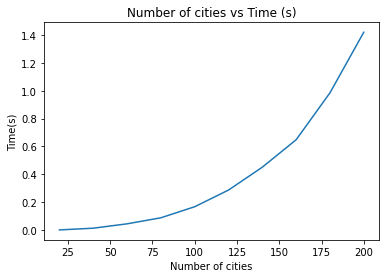

In [342]:
av_runs = [20,40,60,80,100,120,140,160,180,200]
av_means = []

av_means.append(mean(average_20_av))
av_means.append(mean(average_40_av))
av_means.append(mean(average_60_av))
av_means.append(mean(average_80_av))
av_means.append(mean(average_100_av))
av_means.append(mean(average_120_av))
av_means.append(mean(average_140_av))
av_means.append(mean(average_160_av))
av_means.append(mean(average_180_av))
av_means.append(mean(average_200_av))

plt.plot(av_runs, av_means)
plt.title('Number of cities vs Time (s)')
plt.xlabel('Number of cities')
plt.ylabel('Time(s)')
plt.show()

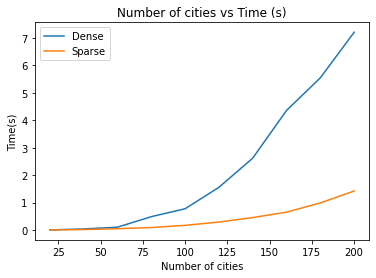

In [360]:
plt.plot(av_runs, worst_means, label = "Dense")
plt.plot(av_runs, av_means, label = "Sparse")
plt.title('Number of cities vs Time (s)')
plt.xlabel('Number of cities')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

# Correctness Testing

##One City with stations

In [55]:
cities =[
          ['Istanbul','Harem', 'Bostanci'], 
        ]

busRoutes = []
trainRoutes = []
inCityRoute = [['Istanbul_Bostanci', 'Istanbul_Harem', 30]]


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    print(city + ": " + str(min) + " minutes via route:")
    print(result[city][2])
    print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: Istanbul_Harem


From Istanbul_Harem you can reach to cities in shortest: 

No path found!: There is only one city!

Algorithm run time: 0.004018606001409353




## Cities without competible stations

In [60]:
cities =[
          ['Ordu','-', 'Altinordu'], 
         ['Bursa','Merkez', '-'], 
        ]

busRoutes = []
trainRoutes = []
inCityRoute = []


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    if min == float("inf"):
      print("No path found!: No path exists to " + city +" from " + sourceName+ "\n")

    else:
      print(city + ": " + str(min) + " minutes via route:")
      print(result[city][2])
      print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: Ordu_Altinordu


From Ordu_Altinordu you can reach to cities in shortest: 

No path found!: No path exists to Bursa from Ordu_Altinordu

Algorithm run time: 0.00010912099969573319




## Cities with only train stations

In [62]:
cities =[
          ['Ordu','-', 'Altinordu'], 
         ['Balikesir','-', 'Karesi'], 
        ]

busRoutes = []
trainRoutes = [['Ordu_Altinordu', 'Balikesir_Karesi', 5000]]
inCityRoute = []


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    if min == float("inf"):
      print("No path found!: No path exists to " + city +" from " + sourceName+ "\n")

    else:
      print(city + ": " + str(min) + " minutes via route:")
      print(result[city][2])
      print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: Balikesir_Karesi


From Balikesir_Karesi you can reach to cities in shortest: 

Ordu: 5000 minutes via route:
Balikesir_Karesi --> Ordu_Altinordu


Algorithm run time: 0.00010930200005532242




## Cities with only bus

In [63]:
cities =[
          ['Bursa','Merkez', '-'], 
         ['Antalya','Elmali', '-'], 
        ]

busRoutes = [['Bursa_Merkez', 'Antalya_Elmali', 450]]
trainRoutes = []
inCityRoute = []


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    if min == float("inf"):
      print("No path found!: No path exists to " + city +" from " + sourceName+ "\n")

    else:
      print(city + ": " + str(min) + " minutes via route:")
      print(result[city][2])
      print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: Antalya_Elmali


From Antalya_Elmali you can reach to cities in shortest: 

Bursa: 450 minutes via route:
Antalya_Elmali --> Bursa_Merkez


Algorithm run time: 0.00010805100100697018




## Equal routes

In [66]:
cities =[
          ['A','busStation', 'trainStation'], 
         ['B','busStation', 'trainStation'], 
         ['C','busStation', 'trainStation'], 
        ]

busRoutes = [['A_busStation', 'B_busStation', 100], ['A_busStation', 'C_busStation', 100], ['C_busStation', 'B_busStation', 100]]
trainRoutes = [['A_trainStation', 'B_trainStation', 100], ['A_trainStation', 'C_trainStation', 100], ['C_trainStation', 'B_trainStation', 100]]
inCityRoute = [['A_busStation', 'A_trainStation', 100], ['B_busStation', 'B_trainStation', 100], ['C_busStation', 'C_trainStation', 100]]


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    if min == float("inf"):
      print("No path found!: No path exists to " + city +" from " + sourceName+ "\n")

    else:
      print(city + ": " + str(min) + " minutes via route:")
      print(result[city][2])
      print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: C_trainStation


From C_trainStation you can reach to cities in shortest: 

A: 100 minutes via route:
C_trainStation --> A_trainStation


B: 100 minutes via route:
C_trainStation --> B_trainStation


Algorithm run time: 0.000190306000149576




## Binary routes (half have train station - half have bus station )

In [68]:
cities =[
          ['A','-', 'trainStation'], 
         ['B','busStation', '-'], 
         ['C','-', 'trainStation'],
          ['D','busStation', '-'], 
         ['E','-', 'trainStation'], 
         ['F','busStation', '-'], 
        ]

busRoutes = [['B_busStation', 'D_busStation', random.randint(50,500)], ['B_busStation', 'F_busStation', random.randint(50,500)], ['F_busStation', 'D_busStation', random.randint(50,500)]]
trainRoutes = [['A_trainStation', 'C_trainStation', random.randint(50,500)], ['A_trainStation', 'E_trainStation', random.randint(50,500)], ['E_trainStation', 'C_trainStation', random.randint(50,500)]]
inCityRoute = []


vertices = {}
vertexNames = {}
counter = 0
for city in cities:
  if city[1] != '-':
    vertexNames[counter] = city[0] + "_" + city[1]
    vertices[city[0] + "_" +city[1]] = counter
    counter = counter+1
  
  if city[2] != '-':
    vertexNames[counter] = city[0] + "_" + city[2]
    vertices[city[0] + "_" +city[2]] = counter
    counter = counter+1

edges = []
for routes in busRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in trainRoutes:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])
for routes in inCityRoute:
    edges.append([vertices[routes[0]], vertices[routes[1]], routes[2]])
    edges.append([vertices[routes[1]], vertices[routes[0]], routes[2]])


sourceName = input("Enter the name of your starting point: ")
print("\n")

sPoint = vertices[sourceName]

start = time.perf_counter()
distanceEstimates, piList = findShortestPath(sPoint, vertices.keys(), edges)
end = time.perf_counter()


result = {}

for name in vertexNames:
  result[vertexNames[name].split('_')[0]] = [float("inf"), -1, ""]

cityNames = []

for i in range(0, len(vertices)):
  name = vertexNames[i]
  cityName = name.split('_')[0]
  if result[cityName][0] > distanceEstimates[i]:
    result[cityName] = [distanceEstimates[i], i, ""]

routes = []

for i in range(len(piList)):
  a = len(piList) - i - 1 
  x = ""
  if piList[a] != -1:
    x = x +vertexNames[a]
    currVertex = piList[a]
    while(currVertex != -1):
      x = vertexNames[currVertex] + " --> " + x
      currVertex = piList[currVertex]
  
  routes.append(x)


for route in routes:
  a = 0
  starting_point = route.split("-->")
  starting_city = starting_point[0].strip(' ').split("_")[0]
  destination_city = starting_point[-1].strip(' ').split("_")[0]

  if destination_city != "":
    idx_fix = result[destination_city][1]
    idx = len(vertices) - int(idx_fix) -1
    result[destination_city][2] = routes[idx]

print("From " + sourceName + " you can reach to cities in shortest: \n")
for city in result:
  if len(result) == 1:
    print("No path found!: There is only one city!\n")
  if city != sourceName.split('_')[0]:
    min = result[city][0]
    if min == float("inf"):
      print("No path found!: No path exists to " + city +" from " + sourceName+ "\n")

    else:
      print(city + ": " + str(min) + " minutes via route:")
      print(result[city][2])
      print("\n")


print("Algorithm run time: " + str(end - start))
print("\n")

Enter the name of your starting point: F_busStation


From F_busStation you can reach to cities in shortest: 

No path found!: No path exists to A from F_busStation

B: 134 minutes via route:
F_busStation --> B_busStation


No path found!: No path exists to C from F_busStation

D: 136 minutes via route:
F_busStation --> D_busStation


No path found!: No path exists to E from F_busStation

Algorithm run time: 0.0001239039993379265


